# WeatherPy

### Note

- Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [65]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import json

# For stat analysis later on
from scipy.stats import linregress

# API key
from api_keys import weather_api_key

# PIP install then import citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File to a CSV
output_data_file = "output_data/cities.csv"


### Generate Cities List

In [53]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Lists for lat_lngs and cities
lat_lngs = []
cities = []
#countries = []

# Create a set of random lat and lng combinations via np.random
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Fiding nearest city for each lat and lng combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

660

### Perform API Calls

- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [54]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=49986ef2e3493d7465d1b8ab56674b63'

In [55]:
# How to see json data and keys
weather_json = weather_response.json()
weather_json
print(json.dumps(weather_json, indent=4, sort_keys=True))
weather_json.keys()

{
    "city": {
        "coord": {
            "lat": -30.3167,
            "lon": 149.7833
        },
        "country": "AU",
        "id": 2155742,
        "name": "Narrabri",
        "population": 7082,
        "sunrise": 1601408422,
        "sunset": 1601452875,
        "timezone": 36000
    },
    "cnt": 40,
    "cod": "200",
    "list": [
        {
            "clouds": {
                "all": 100
            },
            "dt": 1601413200,
            "dt_txt": "2020-09-29 21:00:00",
            "main": {
                "feels_like": 49.68,
                "grnd_level": 994,
                "humidity": 57,
                "pressure": 1019,
                "sea_level": 1019,
                "temp": 58.64,
                "temp_kf": 0.81,
                "temp_max": 58.64,
                "temp_min": 57.18
            },
            "pop": 0,
            "sys": {
                "pod": "d"
            },
            "visibility": 10000,
            "weather": [
               

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [56]:
weather_response = requests.get(target_url)
weather_response

<Response [200]>

In [57]:
#print(weather_json['city']['name'])
print(weather_json['city']['name'])

Narrabri


In [58]:
# set up lists to hold reponse info
# Need temperature, humidity, cloudiness, and windspeed
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

    
# Loop through the list of cities and perform a request for data on each + append

for city in cities:
    # Add correct unit type 'Imperial'
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        # Review json keys to aquire correct info
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        # Print responses
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass



Processing record 1 of Set 1 | thompson
Processing record 2 of Set 1 | mataura
Processing record 3 of Set 1 | punta arenas
Processing record 4 of Set 1 | saint-francois
Processing record 5 of Set 1 | pacific grove
Processing record 6 of Set 1 | lagoa
Processing record 7 of Set 1 | svetlaya
Processing record 8 of Set 1 | jimo
Processing record 9 of Set 1 | muros
Processing record 10 of Set 1 | santa rosa
Processing record 11 of Set 1 | sulangan
Processing record 12 of Set 1 | atuona
Processing record 13 of Set 1 | awjilah
Processing record 14 of Set 1 | albany
Processing record 15 of Set 1 | chapais
Processing record 16 of Set 1 | carnarvon
Processing record 17 of Set 1 | rikitea
Processing record 18 of Set 1 | paamiut
Record not found
Processing record 19 of Set 1 | jamestown
Processing record 20 of Set 1 | clarksburg
Processing record 21 of Set 1 | matara
Processing record 22 of Set 1 | tarauaca
Record not found
Processing record 23 of Set 1 | bonavista
Processing record 24 of Set 1 |

Processing record 191 of Set 1 | necochea
Processing record 192 of Set 1 | thongwa
Processing record 193 of Set 1 | lorengau
Processing record 194 of Set 1 | hasaki
Processing record 195 of Set 1 | hithadhoo
Processing record 196 of Set 1 | lithgow
Processing record 197 of Set 1 | lumphat
Processing record 198 of Set 1 | bystryy istok
Processing record 199 of Set 1 | valparaiso
Processing record 200 of Set 1 | tungor
Processing record 201 of Set 1 | khatanga
Processing record 202 of Set 1 | samarai
Processing record 203 of Set 1 | pisco
Processing record 204 of Set 1 | boyolangu
Processing record 205 of Set 1 | bereda
Processing record 206 of Set 1 | maniitsoq
Processing record 207 of Set 1 | richards bay
Processing record 208 of Set 1 | mahebourg
Processing record 209 of Set 1 | sorland
Record not found
Processing record 210 of Set 1 | monterrey
Processing record 211 of Set 1 | kramat
Record not found
Record not found
Processing record 212 of Set 1 | correntina
Processing record 213 o

Processing record 381 of Set 1 | gizo
Processing record 382 of Set 1 | saint-pierre
Processing record 383 of Set 1 | chabahar
Processing record 384 of Set 1 | kortkeros
Processing record 385 of Set 1 | shush
Processing record 386 of Set 1 | mogadishu
Processing record 387 of Set 1 | marzuq
Processing record 388 of Set 1 | san angelo
Processing record 389 of Set 1 | bucuresci
Processing record 390 of Set 1 | isla mujeres
Processing record 391 of Set 1 | shibukawa
Processing record 392 of Set 1 | sigli
Processing record 393 of Set 1 | isangel
Processing record 394 of Set 1 | brenham
Processing record 395 of Set 1 | plettenberg bay
Record not found
Processing record 396 of Set 1 | mayumba
Processing record 397 of Set 1 | buritis
Processing record 398 of Set 1 | bongandanga
Processing record 399 of Set 1 | tura
Processing record 400 of Set 1 | mar del plata
Processing record 401 of Set 1 | sobolevo
Processing record 402 of Set 1 | beringovskiy
Processing record 403 of Set 1 | caravelas
Pro

Processing record 569 of Set 1 | calabozo
Processing record 570 of Set 1 | pauini
Processing record 571 of Set 1 | williamsport
Processing record 572 of Set 1 | karatau
Processing record 573 of Set 1 | pedernales
Processing record 574 of Set 1 | port hedland
Processing record 575 of Set 1 | aktash
Processing record 576 of Set 1 | erzin
Processing record 577 of Set 1 | tanete
Processing record 578 of Set 1 | timmins
Processing record 579 of Set 1 | hami
Processing record 580 of Set 1 | miyako
Processing record 581 of Set 1 | oldsmar
Processing record 582 of Set 1 | baturaja
Record not found
Processing record 583 of Set 1 | mangai
Processing record 584 of Set 1 | sualkuchi
Processing record 585 of Set 1 | glenwood springs
Processing record 586 of Set 1 | axim
Processing record 587 of Set 1 | whitecourt
Processing record 588 of Set 1 | binzhou
Processing record 589 of Set 1 | tarija
Processing record 590 of Set 1 | westport
Processing record 591 of Set 1 | sao sebastiao do paraiso
Process

### Convert Raw Data to DataFrame

- Export the city data into a .csv.
- Display the DataFrame

In [75]:
# Creating dataframe
weather_df = {"Country":country,
              "City": cityname,
              "Latitude": lat, 
              "Longitude":lng,
                "Max Temp":max_temp,
              "Humidity":humidity,
              "Cloudiness":cloudiness,
                "Wind Speed":wind_speed,
              "Date":date}
weather_data = pd.DataFrame(weather_df)
weather_data.head()

,Country,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,CA,Thompson,55.7435,-97.8558,54.36,71,65,11.32,1601413200
1,NZ,Mataura,-46.1927,168.8643,41.81,91,99,6.60,1601413200
2,CL,Punta Arenas,-53.1500,-70.9167,38.16,69,46,23.71,1601413200
3,FR,Saint-François,46.4154,3.9054,52.18,93,89,1.54,1601413200
4,US,Pacific Grove,36.6177,-121.9166,68.04,77,1,7.34,1601413200


In [76]:
# Exporting city data into a csv
weather_data.to_csv(r'output_data\my_weather_data.csv')

### Inspect the data and remove the cities where the humidity > 100%.

In [82]:
# Created clean df however, there is no humidty value great than 100%
clean_df = weather_data.loc[weather_data['Humidity'] <= 100]
clean_df

,Country,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,CA,Thompson,55.7435,-97.8558,54.36,71,65,11.32,1601413200
1,NZ,Mataura,-46.1927,168.8643,41.81,91,99,6.60,1601413200
2,CL,Punta Arenas,-53.1500,-70.9167,38.16,69,46,23.71,1601413200
3,FR,Saint-François,46.4154,3.9054,52.18,93,89,1.54,1601413200
4,US,Pacific Grove,36.6177,-121.9166,68.04,77,1,7.34,1601413200
...,...,...,...,...,...,...,...,...,...
599,ES,Mahon,39.8885,4.2658,68.77,71,10,7.36,1601413200
600,NO,Raudeberg,61.9875,5.1352,51.76,96,100,3.29,1601413200
601,PH,San Policarpo,12.1791,125.5072,78.75,85,98,4.36,1601413200
602,NZ,Pareora,-44.4871,171.2132,43.50,49,21,3.33,1601413200


### Plotting the Data

- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

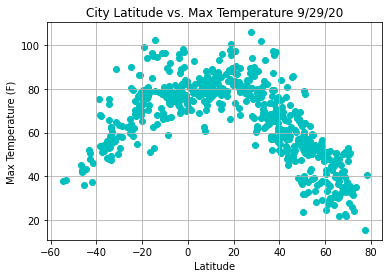

In [108]:
scatlat = weather_data["Latitude"]
scattemp = weather_data["Max Temp"]

# Creating the plot, formating, and priting
plt.scatter(scatlat,scattemp, color = "c", marker='o')
plt.title('City Latitude vs. Max Temperature 9/29/20')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatplotlatitudemaxtemp')
plt.grid(True)
plt.show()